# Рекомендательной система книг на примере работ Дарвина

In [1]:
# импорт библиотек
import glob
import pandas as pd
import re

In [2]:
# считаем все файлы, которые хранятся в папке (книги)
book_files = glob.glob('books/*.txt')
book_files

['books\\Autobiography.txt',
 'books\\CoralReefs.txt',
 'books\\DescentofMan.txt',
 'books\\DifferentFormsofFlowers.txt',
 'books\\EffectsCrossSelfFertilization.txt',
 'books\\ExpressionofEmotionManAnimals.txt',
 'books\\FormationVegetableMould.txt',
 'books\\FoundationsOriginofSpecies.txt',
 'books\\GeologicalObservationsSouthAmerica.txt',
 'books\\InsectivorousPlants.txt',
 'books\\LifeandLettersVol1.txt',
 'books\\LifeandLettersVol2.txt',
 'books\\MonographCirripedia.txt',
 'books\\MonographCirripediaVol2.txt',
 'books\\MovementClimbingPlants.txt',
 'books\\OriginofSpecies.txt',
 'books\\PowerMovementPlants.txt',
 'books\\VariationPlantsAnimalsDomestication.txt',
 'books\\VolcanicIslands.txt',
 'books\\VoyageBeagle.txt']

In [3]:
# создадим список названий книг и список текстов книг
texts = []
titles = []

for file in book_files:
    text = open(file).read()
    title = re.search(r'(?<=\\)\w+', file).group()
    texts.append(text)
    titles.append(title)

In [6]:
print(titles)

['Autobiography', 'CoralReefs', 'DescentofMan', 'DifferentFormsofFlowers', 'EffectsCrossSelfFertilization', 'ExpressionofEmotionManAnimals', 'FormationVegetableMould', 'FoundationsOriginofSpecies', 'GeologicalObservationsSouthAmerica', 'InsectivorousPlants', 'LifeandLettersVol1', 'LifeandLettersVol2', 'MonographCirripedia', 'MonographCirripediaVol2', 'MovementClimbingPlants', 'OriginofSpecies', 'PowerMovementPlants', 'VariationPlantsAnimalsDomestication', 'VolcanicIslands', 'VoyageBeagle']


In [7]:
# Предположим, нам очень понравилась книга "Происхождение видов". 
# Какую книгу из всего списка, нам прочитать следующей, которая может понравится?
# Какие тексты могут считаться похожими?
texts[15]

'\n\n\nON THE\n\nORIGIN OF SPECIES.\n\n       *       *       *       *       *\n\n"But with regard to the material world, we can at least go so far as\nthis--we can perceive that events are brought about not by insulated\ninterpositions of Divine power, exerted in each particular case, but by the\nestablishment of general laws."\n\nWHEWELL: _Bridgewater Treatise_.\n\n"The only distinct meaning of the word \'natural\' is _stated_, _fixed_, or\n_settled_; since what is natural as much requires and presupposes an\nintelligent agent to render it so, _i.e._ to effect it continually or at\nstated times, as what is supernatural or miraculous does to effect it for\nonce."\n\nBUTLER: _Analogy of Revealed Religion_.\n\n"To conclude, therefore, let no man out of a weak conceit of sobriety, or\nan ill-applied moderation, think or maintain, that a man can search too far\nor be too well studied in the book of God\'s word, or in the book of God\'s\nworks; divinity or philosophy; but rather let men e

In [8]:
# приведем все слова к нижнему регистру
texts_lower_case = [text.lower() for text in texts]
# проверим
texts_lower_case[15]

'\n\n\non the\n\norigin of species.\n\n       *       *       *       *       *\n\n"but with regard to the material world, we can at least go so far as\nthis--we can perceive that events are brought about not by insulated\ninterpositions of divine power, exerted in each particular case, but by the\nestablishment of general laws."\n\nwhewell: _bridgewater treatise_.\n\n"the only distinct meaning of the word \'natural\' is _stated_, _fixed_, or\n_settled_; since what is natural as much requires and presupposes an\nintelligent agent to render it so, _i.e._ to effect it continually or at\nstated times, as what is supernatural or miraculous does to effect it for\nonce."\n\nbutler: _analogy of revealed religion_.\n\n"to conclude, therefore, let no man out of a weak conceit of sobriety, or\nan ill-applied moderation, think or maintain, that a man can search too far\nor be too well studied in the book of god\'s word, or in the book of god\'s\nworks; divinity or philosophy; but rather let men e

In [9]:
# уберем все служебные символы
print(len(texts_lower_case[15]))
only_words_text = [re.sub('[\W_]+',' ', text) for text in texts_lower_case]
# проверим
print(len(only_words_text[15]))
only_words_text[15]

945951
916391


' on the origin of species but with regard to the material world we can at least go so far as this we can perceive that events are brought about not by insulated interpositions of divine power exerted in each particular case but by the establishment of general laws whewell bridgewater treatise the only distinct meaning of the word natural is stated fixed or settled since what is natural as much requires and presupposes an intelligent agent to render it so i e to effect it continually or at stated times as what is supernatural or miraculous does to effect it for once butler analogy of revealed religion to conclude therefore let no man out of a weak conceit of sobriety or an ill applied moderation think or maintain that a man can search too far or be too well studied in the book of god s word or in the book of god s works divinity or philosophy but rather let men endeavour an endless progress or proficience in both bacon advancement of learning down bromley kent october 1st 1859 1st thou

In [10]:
# разделим все на слова
texts_splitted = [text.split() for text in only_words_text]
# сколько слов?
len(texts_splitted[15])

158502

In [11]:
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words('english'))
without_sw = [[word for word in text if word not in stopwords_set] for text in texts_splitted]
len(without_sw[15])

80100

Произведем лемматизацию

Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме. 
В русском языке:
- для существительных — именительный падеж, единственное число;
- для прилагательных — именительный падеж, единственное число, мужской род;
- для глаголов, причастий, деепричастий — глагол в инфинитиве несовершенного вида.

В других языках – по аналогии.

In [12]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text = [[wordnet_lemmatizer.lemmatize(word) for word in text] for text in without_sw]
lemmatized_text[15]

['origin',
 'specie',
 'regard',
 'material',
 'world',
 'least',
 'go',
 'far',
 'perceive',
 'event',
 'brought',
 'insulated',
 'interposition',
 'divine',
 'power',
 'exerted',
 'particular',
 'case',
 'establishment',
 'general',
 'law',
 'whewell',
 'bridgewater',
 'treatise',
 'distinct',
 'meaning',
 'word',
 'natural',
 'stated',
 'fixed',
 'settled',
 'since',
 'natural',
 'much',
 'requires',
 'presupposes',
 'intelligent',
 'agent',
 'render',
 'e',
 'effect',
 'continually',
 'stated',
 'time',
 'supernatural',
 'miraculous',
 'effect',
 'butler',
 'analogy',
 'revealed',
 'religion',
 'conclude',
 'therefore',
 'let',
 'man',
 'weak',
 'conceit',
 'sobriety',
 'ill',
 'applied',
 'moderation',
 'think',
 'maintain',
 'man',
 'search',
 'far',
 'well',
 'studied',
 'book',
 'god',
 'word',
 'book',
 'god',
 'work',
 'divinity',
 'philosophy',
 'rather',
 'let',
 'men',
 'endeavour',
 'endless',
 'progress',
 'proficience',
 'bacon',
 'advancement',
 'learning',
 'bromley',

In [13]:
# https://www.machinelearningplus.com/nlp/gensim-tutorial/
# библиотека gensim позволяет эффективно работать с корпусами текстов
from gensim import corpora

# создадим словарь, в котором присвоем каждому словую свой уникальный id
dictionary = corpora.Dictionary(lemmatized_text)
dict(dictionary)

{0: '1',
 1: '11th',
 2: '1250',
 3: '12th',
 4: '13th',
 5: '14',
 6: '15',
 7: '15th',
 8: '16',
 9: '1809',
 10: '1817',
 11: '1818',
 12: '1819',
 13: '1822',
 14: '1825',
 15: '1826',
 16: '1827',
 17: '1828',
 18: '1831',
 19: '1835',
 20: '1836',
 21: '1837',
 22: '1838',
 23: '1839',
 24: '1840',
 25: '1841',
 26: '1842',
 27: '1844',
 28: '1845',
 29: '1846',
 30: '1848',
 31: '1854',
 32: '1856',
 33: '1857',
 34: '1858',
 35: '1859',
 36: '1860',
 37: '1862',
 38: '1864',
 39: '1868',
 40: '1871',
 41: '1872',
 42: '1874',
 43: '1875',
 44: '1876',
 45: '1877',
 46: '1879',
 47: '1880',
 48: '1881',
 49: '1883',
 50: '1884',
 51: '1st',
 52: '2',
 53: '20th',
 54: '230',
 55: '24th',
 56: '265',
 57: '27',
 58: '27th',
 59: '28th',
 60: '29',
 61: '2nd',
 62: '3',
 63: '3000',
 64: '31',
 65: '35',
 66: '39',
 67: '446',
 68: '449',
 69: '45',
 70: '5',
 71: '5267',
 72: '6th',
 73: '7th',
 74: '8',
 75: '800',
 76: '82',
 77: '8500',
 78: '900',
 79: 'abergele',
 80: 'abili

Создадим на основе словаря модель [bag of words](https://en.wikipedia.org/wiki/Bag-of-words_model), которая присваивает каждому слову (id) количество его вхождений в конкретном документе

In [14]:
bows = [dictionary.doc2bow(text) for text in lemmatized_text]
bows

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 2),
  (5, 2),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 2),
  (15, 2),
  (16, 1),
  (17, 3),
  (18, 5),
  (19, 1),
  (20, 2),
  (21, 3),
  (22, 5),
  (23, 8),
  (24, 2),
  (25, 1),
  (26, 8),
  (27, 2),
  (28, 1),
  (29, 3),
  (30, 2),
  (31, 1),
  (32, 3),
  (33, 1),
  (34, 4),
  (35, 3),
  (36, 3),
  (37, 2),
  (38, 1),
  (39, 2),
  (40, 1),
  (41, 1),
  (42, 2),
  (43, 3),
  (44, 6),
  (45, 1),
  (46, 1),
  (47, 2),
  (48, 4),
  (49, 1),
  (50, 1),
  (51, 3),
  (52, 2),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 2),
  (59, 1),
  (60, 2),
  (61, 2),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 2),
  (81, 10),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 1),
  (88, 1),
  (89, 8),
  (90, 3),
  (91, 1

In [15]:
# для примера посмотрим на bow в виде датафрейма для книги "Происхождене видов"
bow_oos = pd.DataFrame(bows[15])
bow_oos.columns = ['index', 'occurrences']
bow_oos
# почему здесь не все индексы?

,index,occurrences
0,0,11
1,5,51
2,6,1
3,8,2
4,21,1
...,...,...
6559,31737,1
6560,31738,1
6561,31739,1
6562,31740,11


In [16]:
# смэтчим индексы с реальными словами
bow_oos['word'] = [dictionary[index] for index in bow_oos['index']]
bow_oos

,index,occurrences,word
0,0,11,1
1,5,51,14
2,6,1,15
3,8,2,16
4,21,1,1837
...,...,...,...
6559,31737,1,wallowing
6560,31738,1,wand
6561,31739,1,weakening
6562,31740,11,webbed


Создадим модель [TF-IDF](https://ru.wikipedia.org/wiki/TF-IDF) (term frequency-inverse document frequency – частотность терминов-обратная частотность документов)

Если слово встречается в каком-либо документе часто, при этом встречаясь редко во всех остальных документах — это слово имеет большую значимость для исходного документа.

In [17]:
from gensim.models import TfidfModel
tfidf = TfidfModel(bows)

# посмотрим, как это выглядит на "Происхождение видов"
tfidf[bows[15]]

# а почему здесь не все индексы?

[(8, 0.00019350992690377207),
 (21, 0.0005426570614772349),
 (23, 0.0016251787216981196),
 (27, 0.00061312158914922),
 (28, 0.0024377680825471795),
 (31, 0.0008125893608490598),
 (35, 0.0009635745792487323),
 (36, 0.0009635745792487323),
 (51, 0.0008418350355429946),
 (54, 0.0019271491584974647),
 (56, 0.0022554097118914866),
 (57, 9.675496345188604e-05),
 (63, 0.0026149784654164454),
 (64, 0.0004837748172594301),
 (66, 0.00019350992690377207),
 (67, 0.0022554097118914866),
 (68, 0.0019271491584974647),
 (75, 0.0013074892327082227),
 (76, 0.0004209175177714973),
 (78, 0.003960576231247278),
 (80, 0.001980288115623639),
 (83, 0.004036793297492497),
 (84, 0.0005426570614772349),
 (86, 0.002322119122845265),
 (87, 0.002515629049749037),
 (88, 0.0013455977658308324),
 (89, 0.0033673401421719785),
 (95, 0.0010853141229544697),
 (96, 0.0008125893608490598),
 (97, 0.0033673401421719785),
 (98, 0.0027823937122484267),
 (99, 0.002525505106628984),
 (101, 0.0011610595614226324),
 (106, 0.0248935

Теперь каждый наш текст представлен по-сути вектором чисел. Сходство между ними мы можем определить при помощи [косинусного сходства](https://www.machinelearningplus.com/nlp/cosine-similarity/) между соответствующими векторами.

In [18]:
from gensim import similarities
cos_sim = similarities.MatrixSimilarity(tfidf[bows])
# преобразуем в датафрейм
cos_sim_df = pd.DataFrame(list(cos_sim))
# добавним название текстов
cos_sim_df.columns = titles
cos_sim_df.index = titles
cos_sim_df

,Autobiography,CoralReefs,DescentofMan,DifferentFormsofFlowers,EffectsCrossSelfFertilization,ExpressionofEmotionManAnimals,FormationVegetableMould,FoundationsOriginofSpecies,GeologicalObservationsSouthAmerica,InsectivorousPlants,LifeandLettersVol1,LifeandLettersVol2,MonographCirripedia,MonographCirripediaVol2,MovementClimbingPlants,OriginofSpecies,PowerMovementPlants,VariationPlantsAnimalsDomestication,VolcanicIslands,VoyageBeagle
Autobiography,1.000000,0.044889,0.072380,0.018229,0.039538,0.074828,0.022018,0.053683,0.028215,0.014681,0.508814,0.270222,0.004988,0.007781,0.015130,0.087535,0.013792,0.040660,0.037587,0.159552
CoralReefs,0.044889,1.000000,0.009906,0.000775,0.001513,0.005143,0.016631,0.021640,0.060474,0.002519,0.042389,0.025544,0.006014,0.010145,0.001576,0.037157,0.003102,0.011073,0.059502,0.181856
DescentofMan,0.072380,0.009906,1.000000,0.028431,0.026319,0.150403,0.018306,0.127416,0.010325,0.009280,0.085311,0.125260,0.049686,0.040884,0.005744,0.256448,0.012952,0.219489,0.009153,0.118659
DifferentFormsofFlowers,0.018229,0.000775,0.028431,1.000000,0.197517,0.002627,0.002739,0.014425,0.001029,0.003209,0.007600,0.031029,0.003530,0.002185,0.003215,0.049177,0.008468,0.018998,0.001124,0.004853
EffectsCrossSelfFertilization,0.039538,0.001513,0.026319,0.197517,1.000000,0.006028,0.020824,0.030333,0.002050,0.006621,0.021258,0.045174,0.002657,0.002596,0.012943,0.118721,0.043615,0.049358,0.002160,0.014994
ExpressionofEmotionManAnimals,0.074828,0.005143,0.150403,0.002627,0.006028,1.000000,0.014282,0.045370,0.005932,0.012463,0.087755,0.073361,0.015585,0.027301,0.007529,0.060123,0.013371,0.077948,0.006113,0.089276
FormationVegetableMould,0.022018,0.016631,0.018306,0.002739,0.020824,0.014282,1.000000,0.012313,0.037426,0.020794,0.024472,0.022656,0.012847,0.014150,0.022502,0.028884,0.028890,0.018775,0.034722,0.059508
FoundationsOriginofSpecies,0.053683,0.021640,0.127416,0.014425,0.030333,0.045370,0.012313,1.000000,0.028265,0.005666,0.079693,0.078101,0.008409,0.011125,0.004095,0.308554,0.009669,0.186489,0.018795,0.083279
GeologicalObservationsSouthAmerica,0.028215,0.060474,0.010325,0.001029,0.002050,0.005932,0.037426,0.028265,1.000000,0.007599,0.039470,0.016848,0.008991,0.022183,0.002333,0.054484,0.004520,0.013910,0.385207,0.242896
InsectivorousPlants,0.014681,0.002519,0.009280,0.003209,0.006621,0.012463,0.020794,0.005666,0.007599,1.000000,0.009128,0.026381,0.018151,0.018899,0.246779,0.013248,0.023978,0.009922,0.010180,0.014253


Text(0.5, 1.0, 'Сходство книг относительно "Происхождение видов"')

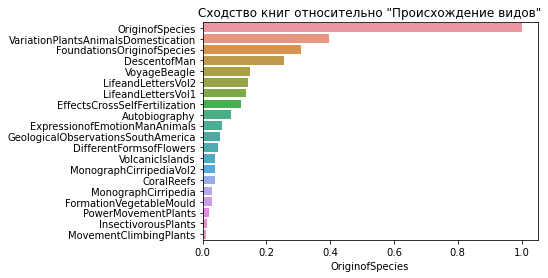

In [19]:
import seaborn as sns

cos_sim_oos = cos_sim_df[['OriginofSpecies']].sort_values('OriginofSpecies', ascending=False)
cos_sim_oos
ax = sns.barplot(y=cos_sim_oos.index, x=cos_sim_oos.OriginofSpecies, orient='h')
ax.set_title('Сходство книг относительно "Происхождение видов"')

Проведем кластеризацию книг при помощи [метода Уорда](https://neerc.ifmo.ru/wiki/index.php?title=%D0%98%D0%B5%D1%80%D0%B0%D1%80%D1%85%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).  
Метод Уорда основан на объединении не максимально близких кластеров, а тех,слияние которых дает наименьший прирост внутрикластерной дисперсии. Этот метод применяется для задач с близко расположенными кластерами.

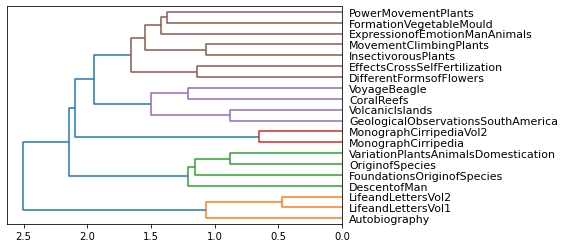

In [22]:
from scipy.cluster import hierarchy
clusters = hierarchy.linkage(cos_sim_df, method='ward')

dendrogram = hierarchy.dendrogram(clusters, 
                                  leaf_font_size=11, 
                                  labels=list(cos_sim_df.index), 
                                  orientation="left")